# About the data

This Data set was collected by a survey conducted by Google forms from University student in order to examine their current academic situation and mental health.

source: kaggle.com

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Data Acquisition

In [2]:
file = 'D:/dataset/Student Mental health.csv'
data = pd.read_csv(file)

In [3]:
data.head(20)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
5,8/7/2020 12:31,Male,19.0,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,No
6,8/7/2020 12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,8/7/2020 12:33,Female,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
8,8/7/2020 12:35,Female,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No
9,8/7/2020 12:39,Male,18.0,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No


In [4]:
# merapikan nama kolom
data.columns = ['timestamp','gender','age','course','year_study','cgpa','marital_status','depression','anxiety','panic_attack','treatment']

# Preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       101 non-null    object 
 1   gender          101 non-null    object 
 2   age             100 non-null    float64
 3   course          101 non-null    object 
 4   year_study      101 non-null    object 
 5   cgpa            101 non-null    object 
 6   marital_status  101 non-null    object 
 7   depression      101 non-null    object 
 8   anxiety         101 non-null    object 
 9   panic_attack    101 non-null    object 
 10  treatment       101 non-null    object 
dtypes: float64(1), object(10)
memory usage: 8.8+ KB


In [6]:
data.describe()

,age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [7]:
# merapikan kolom year_study
year = []
for i in data['year_study']:
    year.append(i.lower())
    
data['year_study'] = year

In [8]:
# merapikan kolom course
course = []
for i in data['course']:
    course.append(i.lower())
    
data['course'] = course

In [9]:
data.head(10)

,timestamp,gender,age,course,year_study,cgpa,marital_status,depression,anxiety,panic_attack,treatment
0,8/7/2020 12:02,Female,18.0,engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,bit,year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
5,8/7/2020 12:31,Male,19.0,engineering,year 2,3.50 - 4.00,No,No,No,Yes,No
6,8/7/2020 12:32,Female,23.0,pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,8/7/2020 12:33,Female,18.0,bcs,year 1,3.50 - 4.00,No,No,Yes,No,No
8,8/7/2020 12:35,Female,19.0,human resources,year 2,2.50 - 2.99,No,No,No,No,No
9,8/7/2020 12:39,Male,18.0,irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No


# Analyze

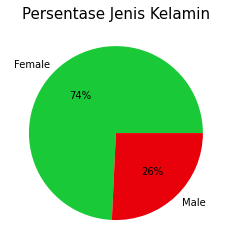

In [10]:
# persentase jenis kelamin
colors = sns.color_palette('bright')[2:4]
plt.pie(data['gender'].value_counts(),labels = data['gender'].unique(),autopct='%.0f%%',colors=colors)
plt.title('Persentase jenis kelamin'.title(),fontsize=15)
plt.show()

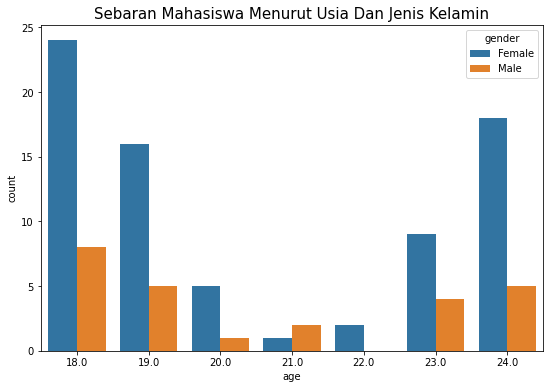

In [11]:
# melihat sebaran jenis kelamin dan usia
fig = plt.figure(figsize=(9,6))
sns.countplot(x = 'age', data = data, hue='gender')
plt.title('Sebaran mahasiswa menurut usia dan jenis kelamin'.title(),size = 15)
plt.show()

Dapat dilihat jika secara keseluruhan terdapat lebih banyak mahasiswa berjenis kelamin perempuan. Jika dilihat menurut usia maka paling banyak adalah mahasiswa dengan usia 18 tahun diikuti usia 24 tahun dan 19 tahun.

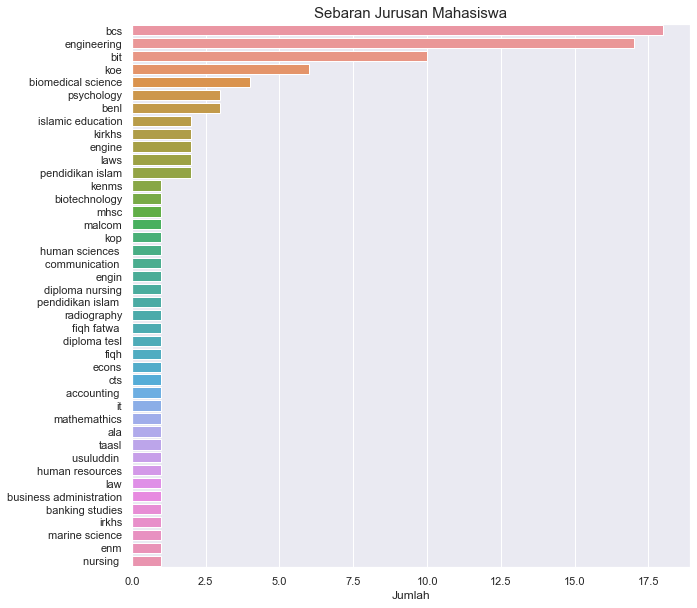

In [12]:
# melihat sebaran jurusan
fig = plt.figure(figsize=(10,10))
sns.set_theme()
sns.countplot(y='course',data = data,order=data['course'].value_counts().index)
plt.xlabel('Jumlah')
plt.ylabel('')
plt.title(label = 'Sebaran Jurusan Mahasiswa',size=15)
plt.show()

Dapat dilihat jika pada dataset yang telah dikumpulkan mahasiswa paling banyak berasal dari jurusan BCS, diikuti Engineering dan BIT.

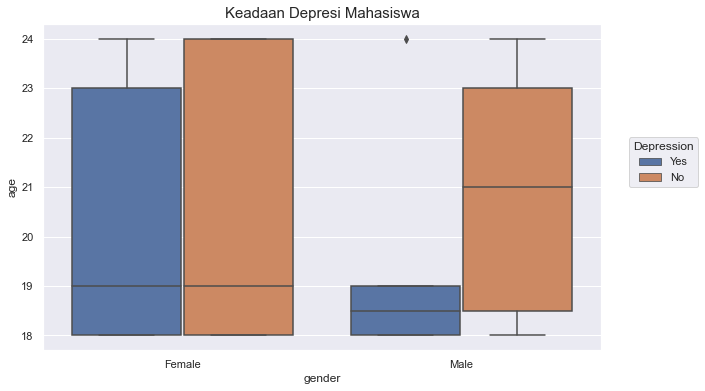

In [13]:
# melihat kesehatan mental para mahasiswa
fig = plt.figure(figsize=(10,6))
sns.boxplot(x = 'gender',y = 'age',data= data,hue = 'depression')
plt.legend(title='Depression',loc=(1.05,0.5))
plt.title('Keadaan depresi mahasiswa'.title(),size=15)
plt.show()

Berdasarkan diagram di atas menunjukkan setengah dari seluruh mahasiswa perempuan 
mengalami depresi pada usia 19 tahun dan mahasiswa laki-laki pada usia 17 tahun. Selain itu
mahasiswa perempuan lebih banyak yang mengalami depresi dari pada mahasiswa laki-laki.

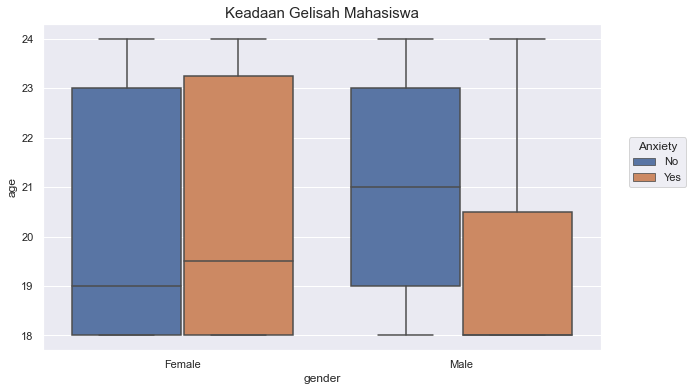

In [14]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x = 'gender',y = 'age',data= data,hue = 'anxiety')
plt.legend(title='Anxiety',loc=(1.05,0.5))
plt.title('Keadaan gelisah mahasiswa'.title(),size=15)
plt.show()

Berdasarkan diagram di atas menunjukkan setengah dari seluruh mahasiswa perempuan mengalami gelisah pada usia 19-20 tahun dan mahasiswa laki-laki pada usia 20-21 tahun.

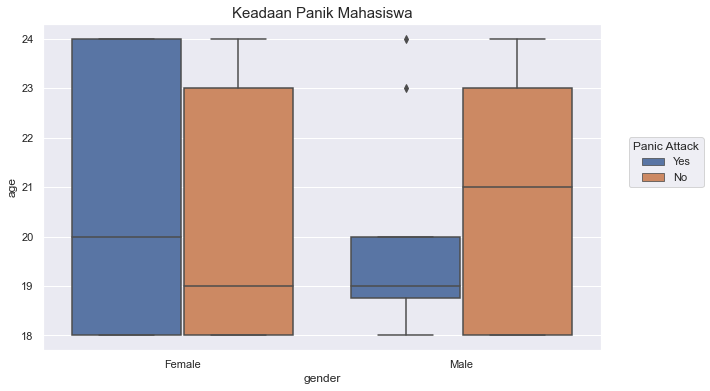

In [15]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x = 'gender',y = 'age',data= data,hue = 'panic_attack')
plt.legend(title='Panic Attack',loc=(1.05,0.5))
plt.title('keadaan panik mahasiswa'.title(),size=15)
plt.show()

Berdasarkan diagram di atas menunjukkan setengah dari seluruh mahasiswa perempuan mengalami kepanikan pada usia 20 tahun dan mahasiswa laki-laki pada usia 19 tahun.

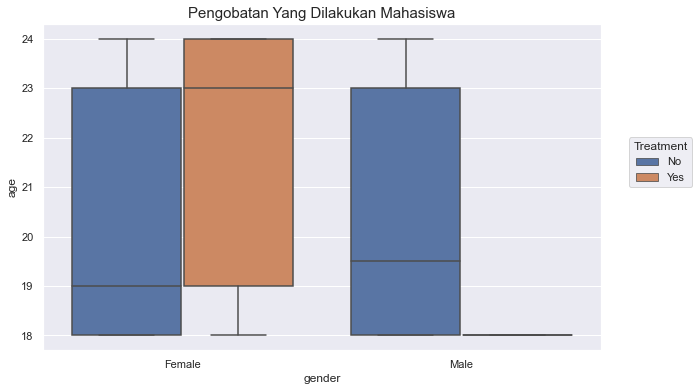

In [16]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x = 'gender',y = 'age',data= data,hue = 'treatment')
plt.legend(title='Treatment',loc=(1.05,0.5))
plt.title('pengobatan yang dilakukan mahasiswa'.title(),size=15)
plt.show()

Berdasarkan diagram di atas menunjukkan mahasiswa laki-laki tidak pernah melakukan pengobatan untuk masalah kesehatan mental.

# Conclusion

Karena jumlah data yang tidak banyak dan faktor-faktor lain tidak dijelaskan dalam dataset maka penulis hanya dapat menyimpulkan sebagai berikut: Sebagian besar mahasiswa mengalami masalah kesehatan mental di rentang usia 17 sampai 21 tahun. Ternyata mahasiswalaki-laki tidak pernah melakukan pengobatan untuk masalah kesehatan mental mereka.